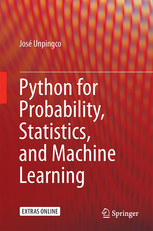

In [1]:
from IPython.display import Image 
Image('../../../python_for_probability_statistics_and_machine_learning.jpg')

[Python for Probability, Statistics, and Machine Learning](https://www.springer.com/fr/book/9783319307152)

In [3]:
from __future__ import division
import numpy as np
np.random.seed(123456)

The absence of the probability density for the raw data means that we have to
argue about sequences of random variables in a structured way. From basic
calculus, recall the following convergence notation,

$$
x_n \rightarrow x_o
$$

 for the real number sequence $x_n$. This means that for any given
$\epsilon>0$, no matter how small, we can exhibit a $m$ such that for
any $n>m$, we have

$$
\vert x_n-x_o \vert < \epsilon
$$

 Intuitively, this means that once we get past $m$ in the sequence, we
get as to within $\epsilon$ of $x_o$. This means that nothing surprising
happens in the sequence on the long march to infinity, which gives a sense of
uniformity to the convergence process.  When we argue about convergence for
statistics, we want to same look-and-feel as we have here, but because we are
now talking about random variables, we need other concepts.  There are two
moving parts for random variables. Recall that random variables are really
functions that map sets into the real line: $X:\Omega \mapsto \mathbb{R}$.
Thus, one part to keep track of is the behavior of the subsets of $\Omega$
while arguing about convergence.   The other part is the sequence of values
that the random variable takes on the real line and how those behave in the
convergence process.

## Almost Sure Convergence

The most straightforward extension into statistics of this convergence concept
is *convergence with probability one*, which is also known as *almost sure
convergence*, which is the following,


$$
P\lbrace \texttt{for each } \epsilon>0 \texttt{ there is } n_\epsilon>0 \texttt{ such that for all } n>n_\epsilon, \: \vert X_n-X \vert < \epsilon   \rbrace = 1
$$


 Note the similarity to the prior notion of convergence for real
numbers.  When this happens, we write this as $X_n \overset{as}{\to} X$.  In
this context, almost sure convergence means that if we take any particular
$\omega\in\Omega$ and then look at the sequence of real numbers that are
produced by each of the random variables,

$$
(X_1(\omega),X_2(\omega),X_3(\omega),\ldots,X_n(\omega))
$$

 then this sequence is just a real-valued sequence in the
sense of our convergence on the real line and converges in the same way. If we
collect all of the $\omega$ for which this is true and the measure of that
collection equals one, then we have almost sure convergence of the random
variable. Notice how the convergence idea applies to both sides of the random
variable: the (domain) $\Omega$ side and the (co-domain) real-valued side. 

An equivalent and more compact way of writing this is the following,

$$
P\left(\omega\in\Omega \colon\lim_{n\rightarrow\infty} X_n(\omega)=X(\omega) \right)=1
$$

**Example.** To get some feel for the mechanics of this kind of convergence
consider the following sequence of uniformly distributed random variables on
the unit interval, $X_n \sim \mathcal{U}[0,1]$. Now, consider taking
the maximum of the set of $n$ such variables as the following,

$$
X_{(n)} = \max \lbrace X_1,\ldots,X_n \rbrace
$$

 In other words, we scan through a list of $n$ uniformly distributed
random variables and pick out the maximum over the set. Intuitively, we should
expect that $X_{(n)}$ should somehow converge to one. Let's see if we can make
this happen almost surely.  We want to exhibit $m$ so that the following is
true,

$$
P(\vert 1 - X_{(n)} \vert) < \epsilon \texttt{ when } n>m
$$

 Because $X_{(n)}<1$, we can simplify this as the following,

$$
1-P(X_{(n)}<\epsilon)=1-(1-\epsilon)^m \underset{m\rightarrow\infty}{\longrightarrow} 1
$$

 Thus, this sequence converges almost surely. We can work this
example out in Python using Scipy to make it concrete with the following
code,

In [4]:
from scipy import stats
u=stats.uniform()
xn = lambda i: u.rvs(i).max()
xn(5)

0.96671783848200299

 Thus, the `xn` variable is the same as the $X_{(n)}$ random variable
in our example. [Figure](#fig:Convergence_001) shows a plot of these random
variables for different values of $n$ and multiple realizations of each random
variable (multiple gray lines). The dark horizontal line is at the `0.95`
level. For this example, suppose we are interested in the convergence of the
random variable to within `0.05` of one so we are interested in the region
between one and `0.95`.  Thus, in our Equation ref{eq:asconv}, $\epsilon=0.05$.
Now, we have to find $n_\epsilon$ to get the almost sure convergence. From
[Figure](#fig:Convergence_001), as soon as we get past $n>60$, we can see that
all the realizations start to fit in the region above the `0.95` horizontal
line.  However, there are still some cases where a particular realization will
skip below this line. To get the probability  guarantee of the definition
satisfied, we have to make sure that for whatever $n_\epsilon$ we settle on,
the probability of this kind of noncompliant behavior should be extremely
small, say, less than 1%.  Now, we can compute the following to estimate this
probability for $n=60$ over 1000 realizations,

In [5]:
import numpy as np
np.mean([xn(60) > 0.95 for i in range(1000)])

0.96099999999999997

 So, the probability of having a noncompliant case beyond $n>60$ is
pretty good, but not still what we are after (`0.99`). We can solve for the $m$
in our analytic proof of convergence by plugging in our factors for $\epsilon$
and our desired probability constraint,

In [6]:
print np.log(1-.99)/np.log(.95)

89.7811349607


 Now, rounding this up and re-visiting the same estimate as above,

In [7]:
import numpy as np
np.mean([xn(90) > 0.95 for i in range(1000)])

0.995

 which is the result we were looking for. The important thing to
understand from this example is that we had to choose convergence criteria for
*both* the values of the random variable (`0.95`) and for the probability of
achieving that level (`0.99`) in order to compute the $m$.  Informally
speaking, almost sure convergence means that not only will any particular $X_n$
be close to $X$ for large $n$, but whole sequence of values will remain close
to $X$ with high probability. 

<!-- dom:FIGURE: [fig-statistics/Convergence_001.png, width=500 frac=0.85] Almost sure convergence example for multiple realizations of the limiting sequence.   <div id="fig:Convergence_001"></div> -->
<!-- begin figure -->
<div id="fig:Convergence_001"></div>

<p>Almost sure convergence example for multiple realizations of the limiting sequence.</p>
<img src="fig-statistics/Convergence_001.png" width=500>

<!-- end figure -->


## Convergence in Probability

A weaker kind of convergence is *convergence in probability* which means the
following:

$$
\mathbb{P}(\mid X_n -X\mid > \epsilon) \rightarrow 0
$$

 as $n \rightarrow \infty$ for each $\epsilon > 0$. 

This is notationally
shown as $X_n \overset{P}{\to} X$.  For example, let's consider the following
sequence of random variables where $X_n = 1/2^n$ with probability $p_n$ and
where $X_n=c$ with probability $1-p_n$. Then, we have $X_n  \overset{P}{\to} 0$
as $p_n \rightarrow 1$.  This is allowable under this notion of convergence
because a diminishing amount of *non-converging* behavior (namely, when
$X_n=c$) is possible. Note that we have said nothing about *how* $p_n
\rightarrow 1$.

**Example.** To get some sense of the mechanics of this kind of convergence,
let $\lbrace X_1,X_2,X_3,\ldots \rbrace$ be the indicators of the corresponding
intervals,

$$
(0,1],(0,\tfrac{1}{2}],(\tfrac{1}{2},1],(0,\tfrac{1}{3}],(\tfrac{1}{3},\tfrac{2}{3}],(\tfrac{2}{3},1]
$$

 In other words, just keep splitting the unit interval into equal
chunks and enumerate those chunks with $X_i$. Because each $X_i$ is an
indicator function, it takes only two values: zero and one.  For example,
for $X_2=1$ if $0<x \le 1/2$ and zero otherwise. Note that $x \sim
\mathcal{U}(0,1)$. This means that $P(X_2=1)=1/2$. Now, we want to compute
the sequence of $P(X_n>\epsilon)$ for each $n$ for some $\epsilon\in (0,1)$.
For $X_1$, we  have $P(X_1>\epsilon)=1$ because we already chose $\epsilon$
in the interval covered by $X_1$. For $X_2$, we have $P(X_2>\epsilon)=1/2$,
for $X_3$, we have $P(X_3>\epsilon)=1/3$, and so on.  This produces the
following sequence:
$(1,\frac{1}{2},\frac{1}{2},\frac{1}{3},\frac{1}{3},\ldots)$.  The limit
of the sequence is zero so that $X_n \overset{P}{\to} 0$. However, for
every $x\in (0,1)$, the sequence of  function values of $X_n(x)$ consists
of infinitely many zeros and ones (remember that indicator functions can
evaluate to either zero or one).  Thus, the set of $x$ for which the
sequence $X_n(x)$ converges is empty because the sequence bounces 
between zero and one. This means that almost sure
convergence fails here even though we have convergence in probability.
The key distinction is that convergence in probability considers the convergence
of a sequence of probabilities whereas almost sure convergence is
concerned about the sequence of values of the random variables over
sets of events that *fill out* the underlying probability space entirely (i.e.,
with probability one).

This is a good example so let's see if we can make it concrete with some
Python. The following is a function to compute the different subintervals,

In [8]:
make_interval= lambda n: np.array(zip(range(n+1),range(1,n+1)))/n

 Now, we can use this function to create a Numpy
array of intervals, as in the example,

In [9]:
intervals= np.vstack([make_interval(i) for i in range(1,5)])
print intervals

[[ 0.          1.        ]
 [ 0.          0.5       ]
 [ 0.5         1.        ]
 [ 0.          0.33333333]
 [ 0.33333333  0.66666667]
 [ 0.66666667  1.        ]
 [ 0.          0.25      ]
 [ 0.25        0.5       ]
 [ 0.5         0.75      ]
 [ 0.75        1.        ]]


 The following function computes the bit string in our example,
$\lbrace X_1,X_2,\ldots,X_n \rbrace$,

In [10]:
bits= lambda u:((intervals[:,0] < u) & (u<=intervals[:,1])).astype(int)
bits(u.rvs())

array([1, 0, 1, 0, 0, 1, 0, 0, 0, 1])

 Now that we have the individual bit strings, to show convergence we
want to show that the probability of each entry goes to a limit. For example,
using ten realizations,

In [11]:
print np.vstack([bits(u.rvs()) for i in range(10)])

[[1 1 0 1 0 0 0 1 0 0]
 [1 1 0 1 0 0 0 1 0 0]
 [1 1 0 0 1 0 0 1 0 0]
 [1 0 1 0 0 1 0 0 1 0]
 [1 0 1 0 0 1 0 0 1 0]
 [1 1 0 0 1 0 0 1 0 0]
 [1 1 0 1 0 0 1 0 0 0]
 [1 1 0 0 1 0 0 1 0 0]
 [1 1 0 0 1 0 0 1 0 0]
 [1 1 0 1 0 0 1 0 0 0]]


 We want the limiting probability of a one in each column to convert
to a limit. We can estimate this over 1000  realizations using the following
code,

In [12]:
np.vstack([bits(u.rvs()) for i in range(1000)]).mean(axis=0)

array([ 1.   ,  0.493,  0.507,  0.325,  0.34 ,  0.335,  0.253,  0.24 ,
        0.248,  0.259])

 Note that these entries should approach the
$(1,\frac{1}{2},\frac{1}{2},\frac{1}{3},\frac{1}{3},\ldots)$ sequence we found
earlier. [Figure](#fig:Convergence_002) shows the convergence of these
probabilities for a large number of intervals. Eventually, the probability
shown on this graph will decrease to zero with large enough $n$. Again, note
that the individual sequences of zeros and ones do not converge, but the
probabilities of these sequences converge. This is the key difference between
almost sure convergence and convergence in probability. Thus, convergence in
probability does *not* imply  almost sure convergence. Conversely, almost sure
convergence *does* imply convergence in probability.


<!-- dom:FIGURE: [fig-statistics/Convergence_002.png, width=500 frac=0.85] Convergence in probability for the random variable sequence.  <div id="fig:Convergence_002"></div> -->
<!-- begin figure -->
<div id="fig:Convergence_002"></div>

<p>Convergence in probability for the random variable sequence.</p>
<img src="fig-statistics/Convergence_002.png" width=500>

<!-- end figure -->


The following notation should help emphasize the difference
between almost sure convergence and convergence in probability, 
respectively,

$$
\begin{align*}
P\left(\lim_{n\rightarrow \infty} \vert X_n-X\vert < \epsilon\right)&=1 \texttt{(almost sure convergence)}  \\\
\lim_{n\rightarrow \infty}  P(\vert X_n-X\vert < \epsilon)&=1 \texttt{(convergence in probability)}
\end{align*}
$$

## Convergence in Distribution

<!-- DasGupta -->
<!-- p. 225 in Boos -->
<!-- p.133 Keener, Delta Method -->
<!-- p. 352 MMA Rose -->
<!-- p. 314, Kobayashi -->
<!-- p. 291 Oloffson -->

So far, we have been discussing convergence in terms of
sequences of probabilities or sequences of values taken by
the random variable.  By contrast,  the next major kind of
convergence is *convergence in distribution* where

$$
\lim_{n \to \infty}  F_n(t) = F(t)
$$

 for all $t$ for which $F$ is continuous and $F$ is the
cumulative density function. For this case, convergence is only
concerned with the cumulative density function, written as $X_n
\overset{d}{\to} X$.  

**Example.** To develop some intuition about this kind of convergence,
consider a sequence of $X_n$ Bernoulli random variables. Furthermore,
suppose these are all really just the same random variable $X$.
Trivially, $X_n \overset{d}{\to} X$. Now, suppose we define $Y=1-X$,
which means that $Y$ has the same distribution as $X$. Thus, $X_n
\overset{d}{\to} Y$. By contrast, because $\vert X_n - Y\vert=1$ for all
$n$, we can never have almost sure convergence or convergence in
probability. Thus, convergence in distribution is the weakest
of the three forms of convergence in the sense that it is implied by
the other two, but implies neither of the two.

As another striking example, we could have $Y_n \overset{d}{\to} Z$ where $Z
\sim \mathcal{N}(0,1)$, but we could also have $Y_n \overset{d}{\to} -Z$.
That is, $Y_n$ could converge in distribution to either $Z$ or $-Z$. This
may seem ambiguous, but this kind of convergence is practically very useful
because it allows for complicated distributions to be approximated by
simpler distributions.  

## Limit Theorems
<div id="ch:stats:sec:limit"></div>

Now that we have all of these notions of convergence, we can apply them to
different situations and see what kinds of claims we can construct from them.

**Weak Law of Large Numbers.**  Let $\lbrace X_1,X_2,\ldots,X_n \rbrace$ be an
iid set of random variables with finite mean $\mathbb{E}(X_k)=\mu$ and finite
variance. Let $\overline{X}_n = \frac{1}{n}\sum_k X_k$. Then, we have
$\overline{X}_n \overset{P}{\to} \mu$. This result is important because we
frequently estimate parameters using an averaging process of some kind. This
basically justifies this in terms of convergence in probability. Informally,
this means that the distribution of $\overline{X}_n$ becomes
concentrated around $\mu$ as $n\rightarrow\infty$.

**Strong Law of Large Numbers.**  Let $\lbrace X_1,X_2,\ldots,\rbrace$ be an
iid set of random variables. Suppose that $\mu=\mathbb{E}\vert
X_i\vert<\infty$, then $\overline{X}_n \overset{as}{\to} \mu$. The reason this
is called the strong law is that it implies the weak law because almost sure
convergence implies convergence in probability. The so-called  Komogorov
criterion gives the convergence of the following,

$$
\sum_k \frac{\sigma_k^2}{k^2}
$$

 as a sufficient condition for concluding that the Strong Law applies
to the sequence $ \lbrace X_k \rbrace$ with corresponding $\lbrace \sigma_k^2
\rbrace$.

As an example, consider an infinite sequence of Bernoulli trials with $X_i=1$
if the $i^{th}$ trial is successful. Then $\overline{X}_n$ is the relative
frequency of successes in $n$ trials and $\mathbb{E}(X_i)$ is the
probability $p$ of success on the $i^{th}$ trial. With all that established,
the Weak Law says only that if we consider a sufficiently large and fixed
$n$, the probability that the relative frequency will converge to $p$ is
guaranteed. The Strong Law states that if we regard the observation of all
the infinite $\lbrace X_i \rbrace$ as one performance of the experiment, the
relative frequency of successes will almost surely converge to $p$.  The
difference between the Strong Law and the Weak Law of large numbers is
subtle and rarely arises in practical applications of probability theory.

**Central Limit Theorem.**  Although the Weak Law of Large Numbers tells us
that the distribution of $\overline{X}_n$ becomes concentrated around $\mu$, it
does not tell us what that distribution is. The Central Limit Theorem (CLT)
says that $\overline{X}_n$ has a distribution that is approximately Normal
with mean $\mu$ and variance $\sigma^2/n$. Amazingly, nothing is assumed
about the distribution of $X_i$, except the existence
of the mean and variance. The following is the Central Limit Theorem:
Let $\lbrace X_1,X_2,\ldots,X_n \rbrace$ be iid with mean $\mu$ and
variance $\sigma^2$. Then,

$$
Z_n = \frac{\sqrt{n}(\overline{X}_n-\mu)}{\sigma} \overset{P}{\longrightarrow} Z\sim\mathcal{N}(0,1)
$$

 The loose interpretation of the Central Limit Theorem is that
$\overline{X}_n$ can be legitimately approximated by a Normal distribution.
Because we are talking about convergence in probability here, claims
about probability are legitimized, not claims about the random variable
itself. Intuitively, this shows that normality arises from sums of small,
independent disturbances of finite variance. Technically, the finite
variance assumption is essential for normality. Although the Central Limit
Theorem provides a powerful, general approximation, the quality of the
approximation for a particular situation still depends on the original
(usually unknown) distribution.